In [1]:
# !mkdir models

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

2.9.1
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


In [3]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.boston_housing.load_data()
len(train_features), len(train_labels), len(test_features), len(test_labels)

(404, 404, 102, 102)

In [4]:
len(train_features[0]), train_features[0]

(13,
 array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_features[0])]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu',),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])

model.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=6e-4), 
    # optimizer=tf.keras.optimizers.Adam(), 
    loss='mse', 
    metrics=['mae', 'mse']
)

In [6]:
MODEL_NAME = './models/boston_housing_full_verse.h5'
MONITOR = 'val_loss'
BATCH_SIZE = 3
EPOCHS = 300

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor=MONITOR, factor=0.1, patience=20, min_lr=1e-5)]
callbacks += [tf.keras.callbacks.ModelCheckpoint(MODEL_NAME, monitor=MONITOR, save_best_only=True)]
callbacks += [tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=25, restore_best_weights=True)]

history = model.fit(
    train_features,
    train_labels,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/300
121/121 [==============================] - 3s 13ms/step - loss: 601.4525 - mae: 22.5566 - mse: 601.4595 - val_loss: 460.0427 - val_mae: 20.0296 - val_mse: 460.0760 - lr: 6.0000e-04
Epoch 2/300
121/121 [==============================] - 2s 13ms/step - loss: 510.9680 - mae: 20.3449 - mse: 510.9346 - val_loss: 373.9590 - val_mae: 17.1303 - val_mse: 373.9604 - lr: 6.0000e-04
Epoch 3/300
121/121 [==============================] - 2s 13ms/step - loss: 420.3084 - mae: 17.7683 - mse: 420.2584 - val_loss: 285.5671 - val_mae: 15.3423 - val_mse: 285.5583 - lr: 6.0000e-04
Epoch 4/300
121/121 [==============================] - 2s 16ms/step - loss: 317.6575 - mae: 14.7757 - mse: 317.6352 - val_loss: 210.6082 - val_mae: 13.3933 - val_mse: 210.6084 - lr: 6.0000e-04
Epoch 5/300
121/121 [==============================] - 2s 18ms/step - loss: 238.6904 - mae: 12.6149 - mse: 238.6809 - val_loss: 146.1938 - val_mae: 10.6253 - val_mse: 146.1990 - lr: 6.0000e-04
Epoch 6/300
121/121 [==============

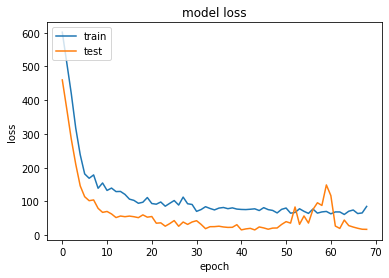

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model = tf.keras.models.load_model(MODEL_NAME)
results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE)
results

34/34 [==============================] - 0s 2ms/step - loss: 33.3232 - mae: 4.3437 - mse: 33.3252


[33.3232421875, 4.343673229217529, 33.3251838684082]

In [9]:
ypred = model.predict(test_features)

from sklearn.metrics import mean_squared_error

mean_squared_error(test_labels, ypred)

4/4 [==============================] - 0s 2ms/step


33.3302552466299